###Goals:
- Mengidentifikasi pola, tren, dan korelasi yang dapat menginformasikan strategi pemasaran, keputusan penempatan produk, dan kegiatan promosi yang bertujuan untuk mengoptimalkan penjualan dan meningkatkan pengalaman berbelanja bagi konsumen.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Pastel1')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Product Positioning.csv')
df.head()

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


In [ ]:
df.shape

(1000, 10)

##A. Apakah terdapat data yang dtypenya tidak sesuai?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


####Dtype dari semua data sudah sesuai

##B. Apakah terdapat data yang mengalami duplicated?

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
df.duplicated().sum()

0

####Tidak ada data yang mengalami duplicated

##C. Apakah terdapat data yang mengalami missing values?

In [ ]:
df.isna().sum().sort_values(ascending=False)

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

####Tidak ada data yang missing values

##D. Apakah terdapat data yang mengalami outliers?

In [ ]:
df.columns

Index(['Product ID', 'Product Position', 'Price', 'Competitor's Price',
       'Promotion', 'Foot Traffic', 'Consumer Demographics',
       'Product Category', 'Seasonal', 'Sales Volume'],
      dtype='object')

In [ ]:
df_to_plot = pd.read_csv('Product Positioning.csv')

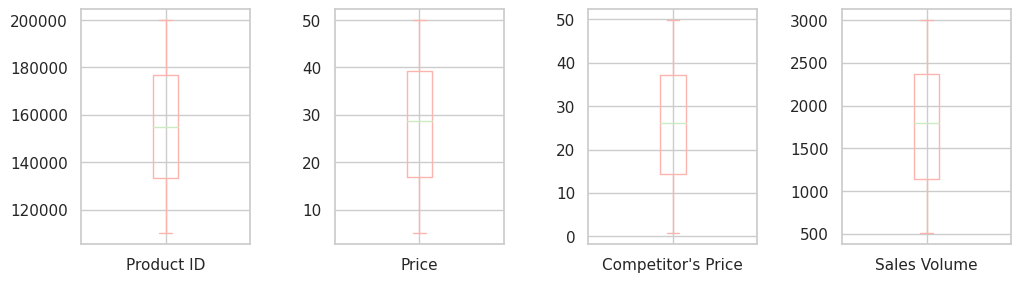

In [ ]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5); #Menyesuaikan jarak horizontal antara subplot menjadi 0.5

In [ ]:
numeric = df_to_plot.columns
numeric

Index(['Product ID', 'Product Position', 'Price', 'Competitor's Price',
       'Promotion', 'Foot Traffic', 'Consumer Demographics',
       'Product Category', 'Seasonal', 'Sales Volume'],
      dtype='object')

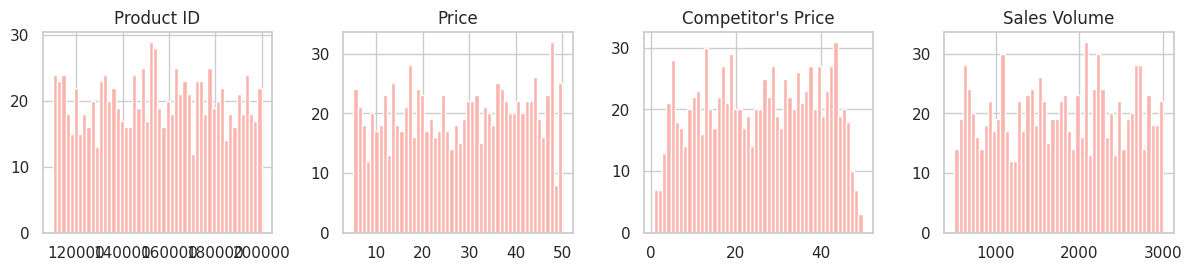

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,5), column=numeric)
plt.tight_layout()
plt.show()

####Tidak ada data yang mengalami outliers

#DATA INSIGHT

###Goals:
- Mengidentifikasi pola, tren, dan korelasi yang dapat menginformasikan strategi pemasaran, keputusan penempatan produk, dan kegiatan promosi yang bertujuan untuk mengoptimalkan penjualan dan meningkatkan pengalaman berbelanja bagi konsumen.

In [ ]:
df.head()

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


##Terhadap Tingkat Promosi

###Product Position

In [ ]:
def barPerc(df,xVar,ax):
  numX=len([x for x in df[xVar].unique() if x==x])
  bars = ax.patches
  for ind in range(numX):
    hueBars=bars[ind:][::numX]
    total = sum([x.get_height() for x in hueBars])
    for bar in hueBars:
      ax.text(bar.get_x() + bar.get_width()/2.,
              bar.get_height(),
              f'{bar.get_height()/total:.0%}',
              ha="center",va="bottom")

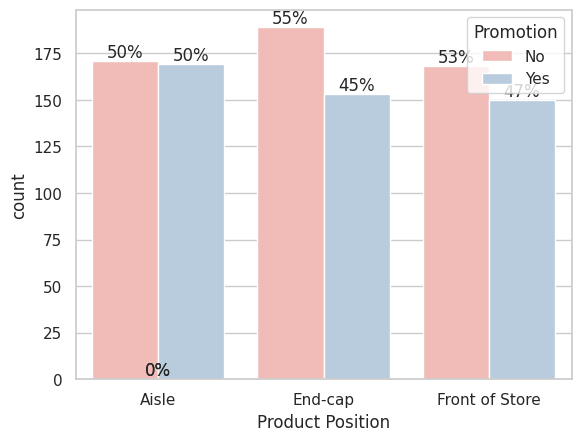

In [ ]:
ax = sns.countplot(x='Product Position', hue='Promotion', data=df)
barPerc(df,'Product Position', ax)

####Barang yang diletakkan di lorong toko cenderung menjadi suatu posisi yang sering digunakan untuk mempromosikan produk

###Price

<Axes: xlabel='Price', ylabel='Count'>

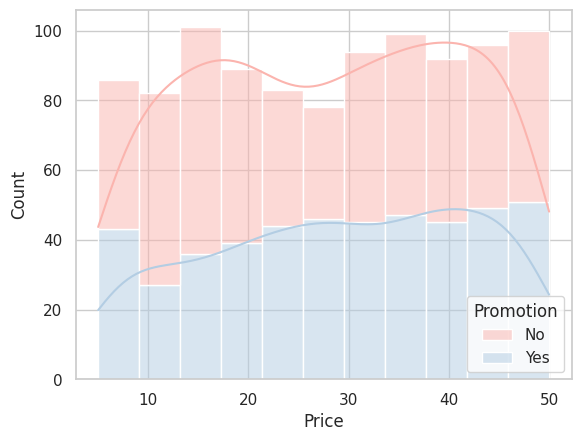

In [ ]:
sns.histplot(data=df, x='Price', hue='Promotion', multiple='stack', kde=True)

####Produk yang memiliki harga 45 - 50, cenderung lebih sering/banyak dipromosikan oleh toko-toko

###Consumer Demographics

<Axes: xlabel='Consumer Demographics', ylabel='Count'>

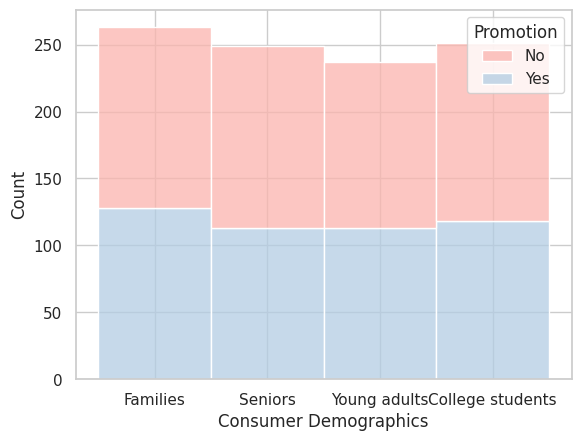

In [ ]:
sns.histplot(data=df, x='Consumer Demographics', hue='Promotion', multiple='stack', kde=False)

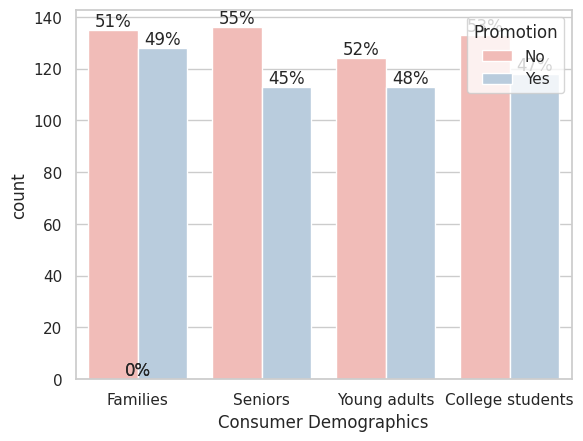

In [ ]:
ax = sns.countplot(x='Consumer Demographics', hue='Promotion', data=df)
barPerc(df,'Consumer Demographics', ax)

####Urutan konsumen yang memiliki daya tarik tertinggi dalam membeli suatu produk dikarenakan adanya promosi adalah orang yang sudah berkeluarga, Dewasa, Manula, dan Mahasiswa

###Product Category

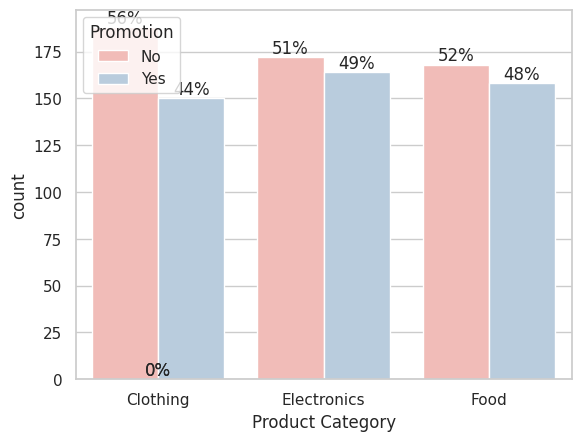

In [ ]:
ax = sns.countplot(x='Product Category', hue='Promotion', data=df)
barPerc(df,'Product Category', ax)

####Kategori produk yang sering dipromosikan oleh toko-toko adalah kategori barang elektronik, makanan, dan pakaian

##Berdasarkan Tingkat Musim

###Product Category

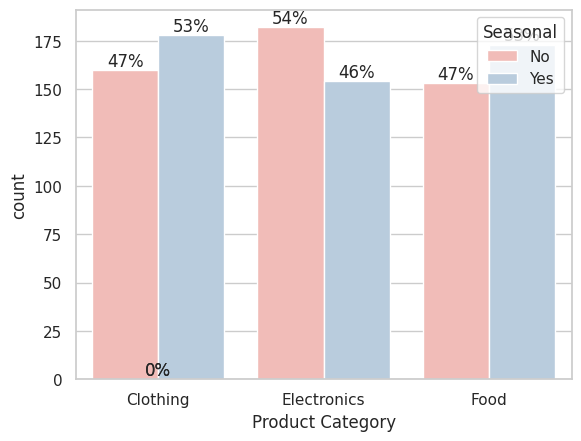

In [ ]:
ax = sns.countplot(x='Product Category', hue='Seasonal', data=df)
barPerc(df,'Product Category', ax)

####Urutan kategori produk yang dijual secara musiman terdapat pakaian, makanan, dan terakhir alat elektronik.

## Data Splitting :
- Data Train (Mempelajari data-data dan pola-pola) = 60%
- Data Validation (Untuk mengevaluasi data yang sudah ada di Data Train) = 20%
- Data Test (Untuk pengetesan kembali setelah data validation) = 20%

In [ ]:
df = pd.read_csv('Product Positioning.csv')
df.shape

(1000, 10)

In [ ]:
from sklearn.model_selection import train_test_split
#Fungsi ini digunakan untuk membagi dataset menjadi dua subset: subset untuk pelatihan (training) dan subset untuk pengujian (testing), yang berguna dalam melakukan evaluasi mode

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

#train_test_split berfungsi untuk membagi variabel panggilan menjadi 2 jenis, yaotu df_full_train, df_test untuk code pertama dan df_train, df_valid untuk code kedua

In [ ]:
df_train.shape, df_valid.shape, df_test.shape

((600, 10), (200, 10), (200, 10))

In [ ]:
600/1000, 200/1000, 200/1000

(0.6, 0.2, 0.2)

In [ ]:
df.to_csv('Product Positioning_new.csv', index=False)